Import librabries 

In [1]:

import pandas as pd 
import numpy as np 
from tensorflow.keras import Sequential #This is for stacking the layers 
from tensorflow.keras.layers import Dense, Dropout 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import kernel_metrics
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt 

Load Data set 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/project/USA_Housing.csv"
df = pd.read_csv(path)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

Select Data into Features and Target 

In [5]:
X = df.drop(["Address","Price" ], axis = 1)
y = df["Price"]

SPlit dataset 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0) # in deep learning there is a way to get the validation set, this is 
#in the fit side of the model training 

In [7]:
n_features = X.shape[1]
n_features #This returns the no of features which will be put into the input layer of the newtork 

5

In [8]:
# Normalize the data 
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

Model Architecture 

In [9]:
model = Sequential() #here is like creating a bag to stack your layers  
# input layer 
model.add(Dense(128, kernel_initializer ='normal', input_dim = x_train.shape[1],  activation="relu")) 


# Hidden layer 
model.add(Dense(256,kernel_initializer ='normal', activation = "relu")) # You can increase the number of hideen layer to uinderstand the extrem situation of the features 
model.add(Dropout(0.2))
model.add(Dense( 256,kernel_initializer ='normal', activation = "relu"))# Added multi layer perceptron 
model.add(Dense( 256,kernel_initializer ='normal', activation = "relu"))
model.add(Dropout(0.2))

# Output layer 
model.add(Dense(1,kernel_initializer ='normal', activation = "linear")) # here the final layer will result to a regression value or just a single value; hnece, a linear activation function 

# compile 
model.compile (loss = 'mse', optimizer ='adam', metrics =['accuracy']  )

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 2

In [21]:
checkpoint_name = 'weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint (checkpoint_name, monitor ='val_loss', verbose = 1, save_best_only =True , mode = 'auto' ) # model checkpoint saves the most improved result at different epochs 
callbacks_list = [checkpoint] 

In [23]:
model.fit(x_train_sc, y_train, batch_size = 32, epochs = 100, verbose = 2, validation_split =0.2,  callbacks = callbacks_list ) # validation split is done during training as seen 


Epoch 1/100

Epoch 1: val_loss improved from inf to 10503259136.00000, saving model to weights-001--10503259136.00000.hdf5
100/100 - 2s - loss: 16993184768.0000 - accuracy: 0.0000e+00 - val_loss: 10503259136.0000 - val_accuracy: 0.0000e+00 - 2s/epoch - 24ms/step
Epoch 2/100

Epoch 2: val_loss did not improve from 10503259136.00000
100/100 - 1s - loss: 17124013056.0000 - accuracy: 0.0000e+00 - val_loss: 11468784640.0000 - val_accuracy: 0.0000e+00 - 1s/epoch - 13ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 10503259136.00000
100/100 - 1s - loss: 16838125568.0000 - accuracy: 0.0000e+00 - val_loss: 10585368576.0000 - val_accuracy: 0.0000e+00 - 1s/epoch - 13ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 10503259136.00000
100/100 - 1s - loss: 17530839040.0000 - accuracy: 0.0000e+00 - val_loss: 10533696512.0000 - val_accuracy: 0.0000e+00 - 757ms/epoch - 8ms/step
Epoch 5/100

Epoch 5: val_loss did not improve from 10503259136.00000
100/100 - 1s - loss: 16743075840.00

In [12]:
score = pd.DataFrame(model.history.history)
score

,loss,accuracy,val_loss,val_accuracy
0,1.609099e+12,0.0,1.409393e+12,0.0
1,4.069047e+11,0.0,6.976043e+10,0.0
2,7.078460e+10,0.0,6.341771e+10,0.0
3,6.643691e+10,0.0,5.891493e+10,0.0
4,6.269870e+10,0.0,5.550811e+10,0.0
...,...,...,...,...
95,1.689425e+10,0.0,1.076065e+10,0.0
96,1.687540e+10,0.0,1.065752e+10,0.0
97,1.716833e+10,0.0,1.229512e+10,0.0
98,1.733622e+10,0.0,1.052026e+10,0.0


<Axes: >

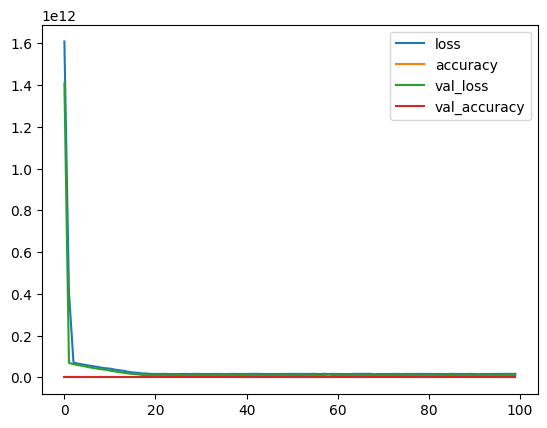

In [13]:
score.plot()

In [14]:
x_test_sc 

array([[0.35636081, 0.38625066, 0.33547774, 0.49555556, 0.59183558],
       [0.38653628, 0.39279196, 0.30125424, 0.1       , 0.55270527],
       [0.49487921, 0.3863426 , 0.31247621, 0.44666667, 0.33181456],
       ...,
       [0.19335815, 0.64135387, 0.17046111, 0.06      , 0.22472747],
       [0.48007228, 0.53458442, 0.38910604, 0.52666667, 0.44951999],
       [0.47587904, 0.54918655, 0.54641789, 0.22888889, 0.23567508]])

In [27]:
pred_x_test = model.predict(x_test_sc)

32/32 [==============================] - 0s 8ms/step


In [16]:
# Mean absolute error 
mean_absolute_error(pred_x_test, y_test)  


84118.28832554903

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


Deduction 

We can see from the mean squared error that the difference from the predicted and mean value from the actual data set was a deviation of about 

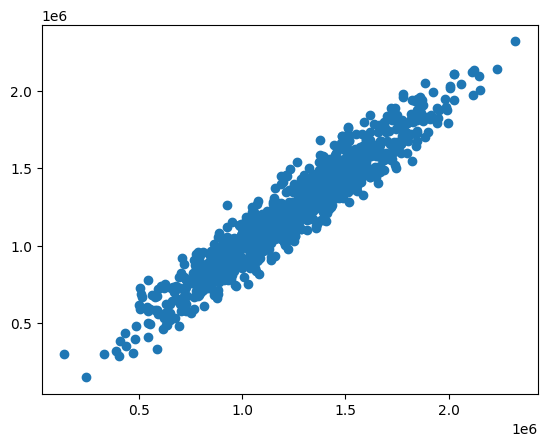

In [25]:
plt.scatter( pred_x_test, y_test)
# plt.plot(pred_x_test, y_test, 'r')

Conclusion

The model did great work giving a predictive value with mean absolute error of 84118; more of a deviatioin of this value from the house mean price of 1.2Million dollars. 
This amounts to an error of 6.9 in predicting. 